<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/notebooks/es20.3/metropolis_V1_numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
#
from numba import njit


In [2]:
@njit
def metreopolis_step(lattice, beta, L,rands):
  #rands sarà un array (n_step,_L*L,3) # (0,1)

  for r in range(L*L):
    i = int(rands[r,0]*L)
    j = int(rands[r,1]*L)

    # i valori dei 4 spin vicini #sopra, sotto, destra, sinistra
    up = lattice[(i-1)%L,j]
    down = lattice[(i+1)%L,j]
    right = lattice[i,(j+1)%L]
    left = lattice[i,(j-1)%L]

    dE = 2*lattice[i,j]*(up+down+right+left)

    if beta ==None:
       if dE < 0:# step a zero temp
        lattice[i,j] = -lattice[i,j]
    else:

      if dE < 0:
        lattice[i,j] = -lattice[i,j]
      else:
        if rands[r,2] < np.exp(-beta*dE):
          lattice[i,j] = -lattice[i,j]

  return lattice




In [3]:
@njit
def compute_magnetization(lattice):
  return np.sum(lattice)/lattice.size

In [4]:
# simulation loop, ripeti metropoli step per N step, definito da utente
@njit
def simulation_loop(lattice,n_steps,temperature,L):
  magnetizations = np.empty(n_steps)# salviamo la magnetizzazione a ogni tempo

  if temperature > 0:
    beta = 1/temperature
  else:
    beta = None
  rands = np.random.rand(n_steps,L*L,3)
  for i in range(n_steps):
    lattice = metreopolis_step(lattice, beta, L,rands[i])
    magnetizations[i] = compute_magnetization(lattice)

  return lattice, magnetizations

In [5]:

def ising_simulation(grid_size,temperature, n_steps, initial_state=None):
  if initial_state is None:
    lattice = np.random.choice([-1,1], size=(grid_size,grid_size))
  else:
    lattice = initial_state

  start_simulation = time.time()# prende il tempo di inizio

  lattice,magnetizations = simulation_loop(lattice,n_steps,temperature,grid_size)

  total_time = time.time() - start_simulation# misuro intervallo di tempo

  return lattice, magnetizations, total_time

In [6]:
ts = []
for i in range(100):

  _,_,t=ising_simulation(100,0.1, 200)
  ts.append(t)
  print("simulation time : ",t)

simulation time :  4.280218839645386
simulation time :  0.2921714782714844
simulation time :  0.22213315963745117
simulation time :  0.2984962463378906
simulation time :  0.29448652267456055
simulation time :  0.2942545413970947
simulation time :  0.32549095153808594
simulation time :  0.35312747955322266
simulation time :  0.2641904354095459
simulation time :  0.3042943477630615
simulation time :  0.30385351181030273
simulation time :  0.38614559173583984
simulation time :  0.47739195823669434
simulation time :  0.32741880416870117
simulation time :  0.46646976470947266
simulation time :  0.1827535629272461
simulation time :  0.23517274856567383
simulation time :  0.25071263313293457
simulation time :  0.2264413833618164
simulation time :  0.2320563793182373
simulation time :  0.23099803924560547
simulation time :  0.2273240089416504
simulation time :  0.2576475143432617
simulation time :  0.23728489875793457
simulation time :  0.22954273223876953
simulation time :  0.2305662631988525

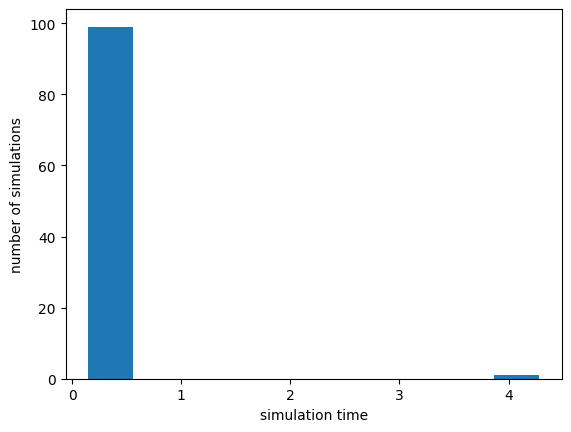

In [7]:
plt.hist(ts)
plt.xlabel("simulation time")
plt.ylabel("number of simulations")
plt.show()

In [8]:
plt.plot(ms)
plt.xlabel("step")
plt.ylabel("magnetization")
plt.show()

NameError: name 'ms' is not defined

In [ ]:
plt.imshow(lattice)
plt.show()